In [69]:
import sys
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# packages for Survival analyis
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest, ExtraSurvivalTrees
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.svm import FastKernelSurvivalSVM

import shap
shap.initjs()

import survlimepy
from survlimepy import SurvLimeExplainer
from survlimepy.load_datasets import Loader

In [1]:
X_tr=pd.read_csv("data/X_train_surv.csv", index_col=0)
X_t=pd.read_csv("data/X_test_surv.csv", index_col=0)

y_train=pd.read_csv("data/y_train_surv.csv", index_col=0)
y_test=pd.read_csv("data/y_test_surv.csv", index_col=0)

y_tr=y_train.to_records(index=False)
y_t=y_test.to_records(index=False)

times = np.linspace(min(y_t["OSGeneraleMesi"])+0.001,max(y_t["OSGeneraleMesi"])-0.001,30)

NameError: name 'pd' is not defined

In [71]:
y_t

rec.array([(False,  60.93333333), (False,   5.6       ),
           ( True,  14.06666667), ( True,  52.63333333),
           ( True,   2.5       ), ( True,   1.86666667),
           ( True,  37.73333333), ( True,   8.1       ),
           ( True,  12.6       ), ( True,  37.2       ),
           ( True,  22.06666667), ( True,  22.96666667),
           (False,  50.96666667), (False,  15.16666667),
           ( True,   6.86666667), ( True,   8.26666667),
           (False,  41.63333333), ( True,  27.8       ),
           (False,  80.96666667), ( True,  10.86666667),
           ( True,  45.4       ), (False,   6.53333333),
           (False,  54.6       ), ( True,  85.        ),
           ( True,  22.06666667), (False,  54.        ),
           ( True,  21.4       ), ( True,  27.        ),
           ( True,   3.1       ), ( True,   3.1       ),
           ( True,  10.46666667), ( True, 125.13333333),
           ( True,  13.83333333), ( True,   4.96666667),
           (False,  24.6       

In [72]:
new_columns=['BMI', 'ANC', 'AMC', 'logALC','logNLR','logLDH','IO/IOCT','Surgery','Sex','Histology','TNMd','Nr Line IO','TNMio','ECOG PS','Liver mets','RT','Lymph nodes mets','Adrenal mets','PDL1']
X_tr.columns=new_columns
X_t.columns=new_columns
X_tr

,BMI,ANC,AMC,logALC,logNLR,logLDH,IO/IOCT,Surgery,Sex,Histology,TNMd,Nr Line IO,TNMio,ECOG PS,Liver mets,RT,Lymph nodes mets,Adrenal mets,PDL1
0,1.856246,-0.791239,-0.547583,-0.965864,-1.353323,-0.268396,1,0,1,2,4,2,1,1,0,1,0,0,2
1,-0.648786,-0.309190,-0.102402,-0.384947,0.011636,0.693996,1,1,1,1,2,2,2,1,0,1,0,1,3
2,-0.603542,-0.809092,-0.547583,-1.357900,-0.140598,0.164937,1,0,0,1,4,3,2,0,0,1,0,0,3
3,-0.390098,-0.898361,-0.918566,-1.523270,-1.201088,0.035202,1,0,1,1,3,2,1,0,0,0,0,0,2
4,0.875840,-0.344897,-0.547583,0.749996,-0.167310,-0.587594,1,0,0,1,4,2,1,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1.278902,-0.452019,-0.918566,-0.801481,0.688330,-0.982321,2,0,1,1,4,1,2,1,0,1,0,1,1
425,0.635919,-0.198427,-0.105827,0.034591,0.156836,0.233840,2,0,0,1,3,1,0,1,0,0,0,0,1
426,-0.449708,0.529932,0.194385,0.691192,0.470666,-0.553809,1,0,1,2,4,1,1,1,0,0,0,1,2
427,-0.603630,-0.487726,-0.918566,-0.811347,0.621030,-0.537084,1,1,1,2,3,1,2,1,0,1,0,1,2


## <br><br> Cox Proportional Hazards

In [65]:
cox=CoxPHSurvivalAnalysis(n_iter=5)
cox.fit(X_tr, y_tr)

Optimization did not converge: Maximum number of iterations has been exceeded.


CoxPHSurvivalAnalysis(n_iter=5)

### Global Explainability

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


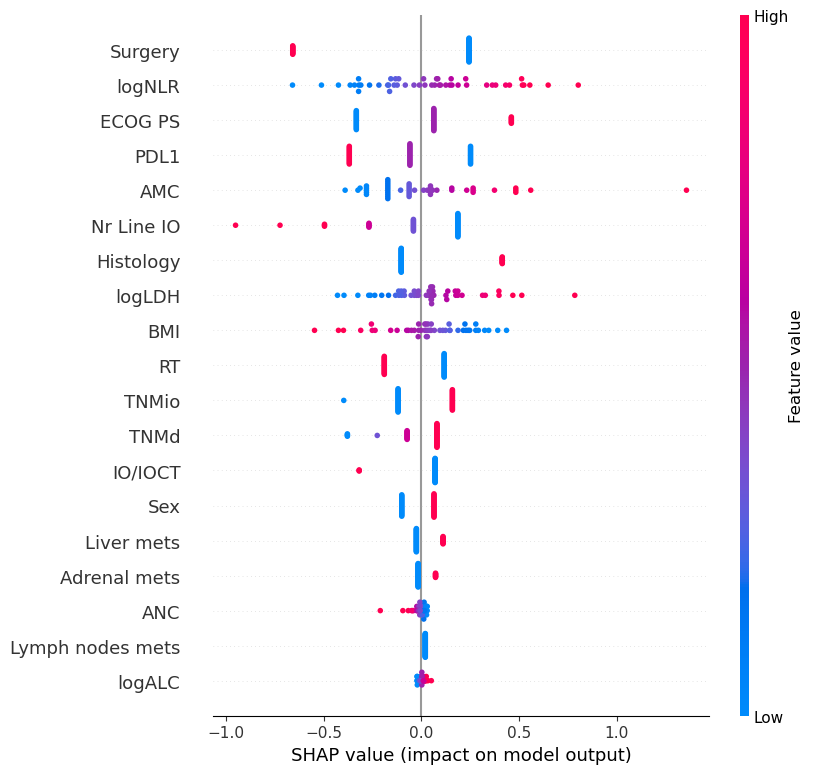

In [71]:
explainer = shap.Explainer(cox.predict,X_tr)
shap_values = explainer(X_t)

plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_values, max_display=19, show=False)

#plt.savefig("images explainability/summary_cox.png", format='png')

In [74]:
#shap.plots.waterfall(shap_values[27], max_display=19, show=True)
shap_values

.values =
array([[ 2.45994789e-02, -8.64185302e-03,  2.64617336e-01,
         8.97167925e-03, -3.80959169e-02, -8.85340972e-02,
         6.99580186e-02, -6.58648926e-01,  6.43514650e-02,
        -1.03416035e-01, -7.33515804e-02,  1.86624271e-01,
        -1.19523894e-01, -3.33234462e-01, -2.59497625e-02,
        -1.90056345e-01,  1.97140789e-02,  7.22272415e-02,
        -3.69218516e-01],
       [ 9.47534395e-02, -2.43608300e-02,  7.89953751e-02,
         1.39790212e-02,  9.74907848e-02, -2.60786076e-01,
        -3.18697640e-01,  2.43609877e-01,  6.43514650e-02,
        -1.03416035e-01,  7.94642121e-02,  1.86624271e-01,
         1.58438650e-01,  4.60180923e-01,  1.10627935e-01,
         1.16486147e-01,  1.97140789e-02,  7.22272415e-02,
         2.51316805e-01],
       [ 3.03949110e-02, -8.65671236e-03,  3.03032775e-02,
         1.51322662e-02,  1.52083018e-01,  4.96208868e-02,
         6.99580186e-02,  2.43609877e-01, -1.00652291e-01,
        -1.03416035e-01,  7.94642121e-02,  1.86624271

In [130]:
#shap.dependence_plot('SurgeryY/N',shap_values.values,X_t)

In [1]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
#shap.dependence_plot('rank(0)', shap_values.values, X_t, ax=axes[0, 0], show=False, x_jitter=0.3)
#shap.dependence_plot('rank(1)', shap_values.values, X_t, ax=axes[0, 1], show=False)
#shap.dependence_plot('rank(2)', shap_values.values, X_t, ax=axes[1, 0], show=False, x_jitter=0.3)
#shap.dependence_plot('rank(3)', shap_values.values, X_t, ax=axes[1, 1], show=False)
#plt.show()

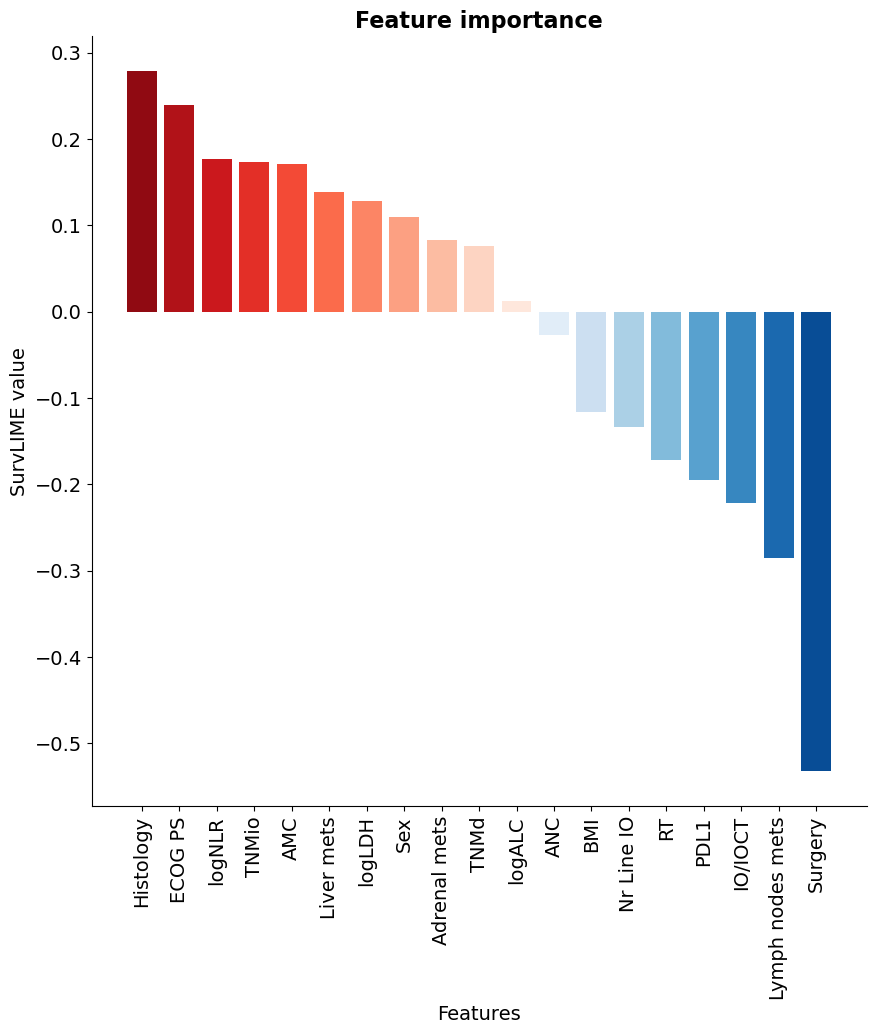

In [68]:
#### SURVLIME  #################

# Use SurvLimeExplainer class to find the feature importance
explanations=[0,0,0]
explainers=[0,0,0]

training_features = X_tr
training_events = [event for event, _ in y_tr]
training_times = [time for _, time in y_tr]

for i in range(3):
    explainer = SurvLimeExplainer(
        training_features=training_features,
        training_events=training_events,
        training_times=training_times,
        model_output_times=cox.event_times_,
    )


# explanation variable will have the computed SurvLIME values
    explanation = explainer.explain_instance(
        data_row=X_t.iloc[0],
        predict_fn=cox.predict_cumulative_hazard_function,
        num_samples=1000,
    )
    explanations[i]=explanation
    explainers[i]=explainer

# Display the weights
explainers[0].plot_weights()

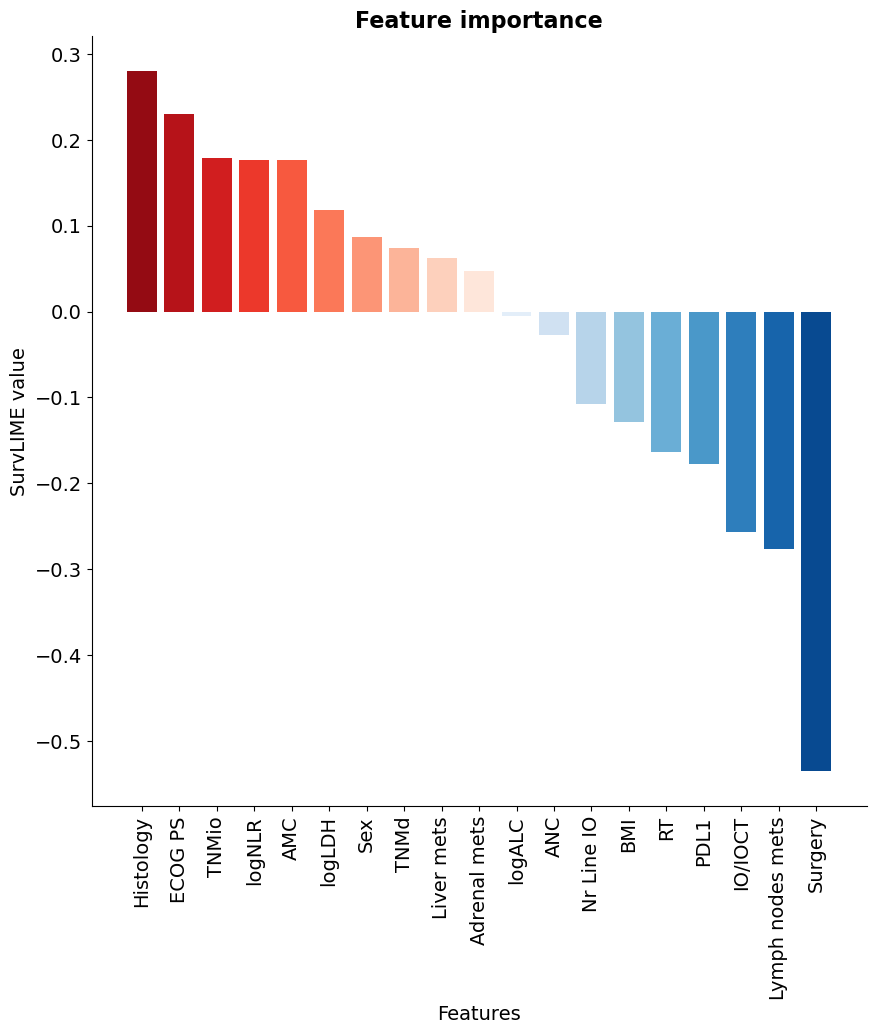

In [62]:
# Display the weights
explainers[1].plot_weights()

In [67]:
explanations.shape

AttributeError: 'list' object has no attribute 'shape'

In [73]:
plt.figure(figsize=(30, 10))
shap.plots.beeswarm(explainers, max_display=19, show=False)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

<Figure size 3000x1000 with 0 Axes>

## -------------------------------------------------------------------------------------------<br><br> Survival SSVM

In [11]:
ssvm=FastKernelSurvivalSVM(alpha= 10, degree=2, gamma=1, kernel='linear')
ssvm.fit(X_tr, y_tr)

FastKernelSurvivalSVM(alpha=10, degree=2, gamma=1, kernel='linear',
                      optimizer='rbtree')

### Global Explainability

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


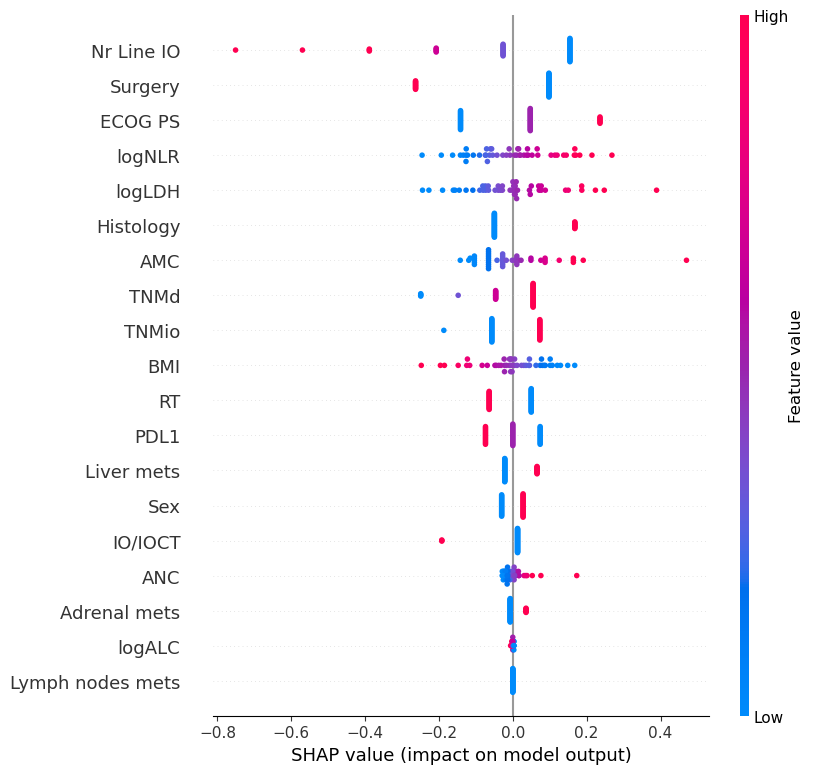

In [12]:
explainer = shap.Explainer(ssvm.predict,X_tr)
shap_values_ssvm = explainer(X_t)

plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_values_ssvm, max_display=19)
#shap.summary_plot(shap_values, max_display=19)

## -------------------------------------------------------------------------------------------<br><br> Random Survival Forest

In [92]:
rf=RandomSurvivalForest(max_depth= 5, min_samples_leaf= 10, min_samples_split= 8, n_estimators=400)
rf.fit(X_tr, y_tr)

RandomSurvivalForest(max_depth=5, min_samples_leaf=10, min_samples_split=8,
                     n_estimators=400)

### Global Explainability

Permutation explainer: 49it [09:36, 12.00s/it]                        
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


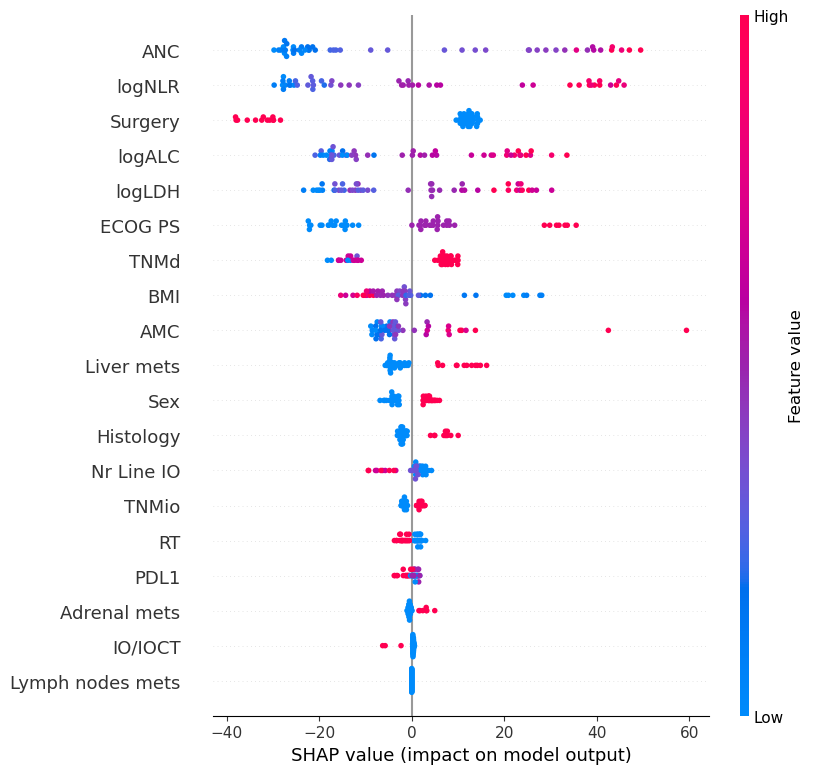

In [14]:
explainer = shap.Explainer(rf.predict,X_tr)
shap_values_rf = explainer(X_t)

plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_values_rf, max_display=19)
#shap.summary_plot(shap_values, max_display=19)

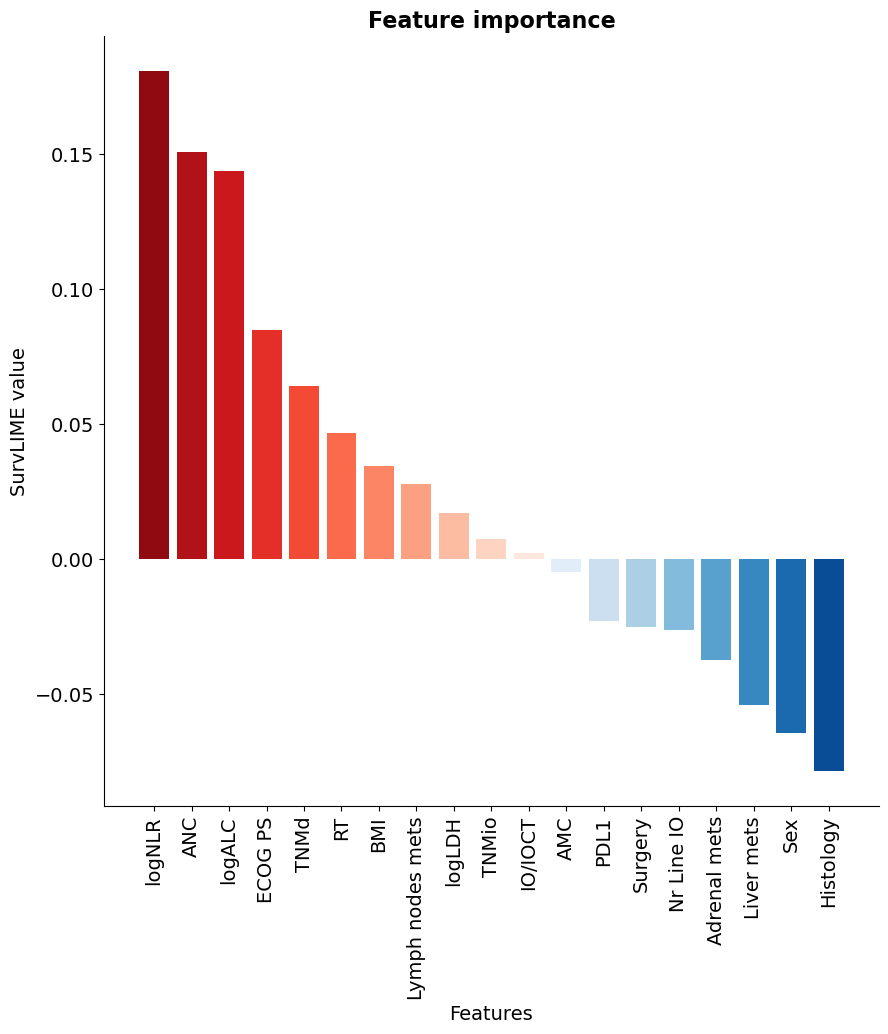

In [94]:
# SurvLime for RSF
explainer_rsf = SurvLimeExplainer(
    training_features=X_tr,
    training_events=[tp[0] for tp in y_tr],
    training_times=[tp[1] for tp in y_tr],
    model_output_times=rf.event_times_,
    random_state=10,
)

b_rsf = explainer_rsf.explain_instance(
    data_row=X_t.iloc[32],
    predict_fn=rf.predict_cumulative_hazard_function,
    num_samples=1000,
    verbose=False,
)

explainer_rsf.plot_weights()

## -------------------------------------------------------------------------------------------<br><br> Extra Survival Trees

In [30]:
et=ExtraSurvivalTrees(max_depth=3, min_samples_leaf= 7, min_samples_split= 8, n_estimators=200)
et.fit(X_tr, y_tr)

ExtraSurvivalTrees(max_depth=3, min_samples_leaf=7, min_samples_split=8,
                   n_estimators=200)

### Global Explainability

Permutation explainer: 49it [07:35,  9.69s/it]                        
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


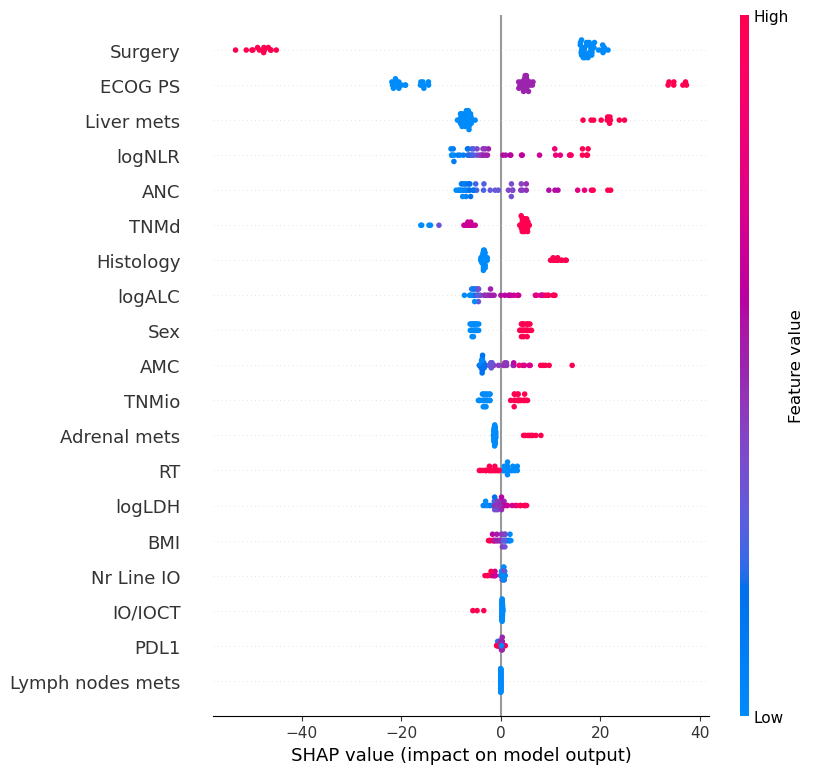

In [31]:
explainer = shap.Explainer(et.predict,X_tr)
shap_values_et = explainer(X_t)

plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_values_et, max_display=19)
#shap.summary_plot(shap_values, max_display=19)

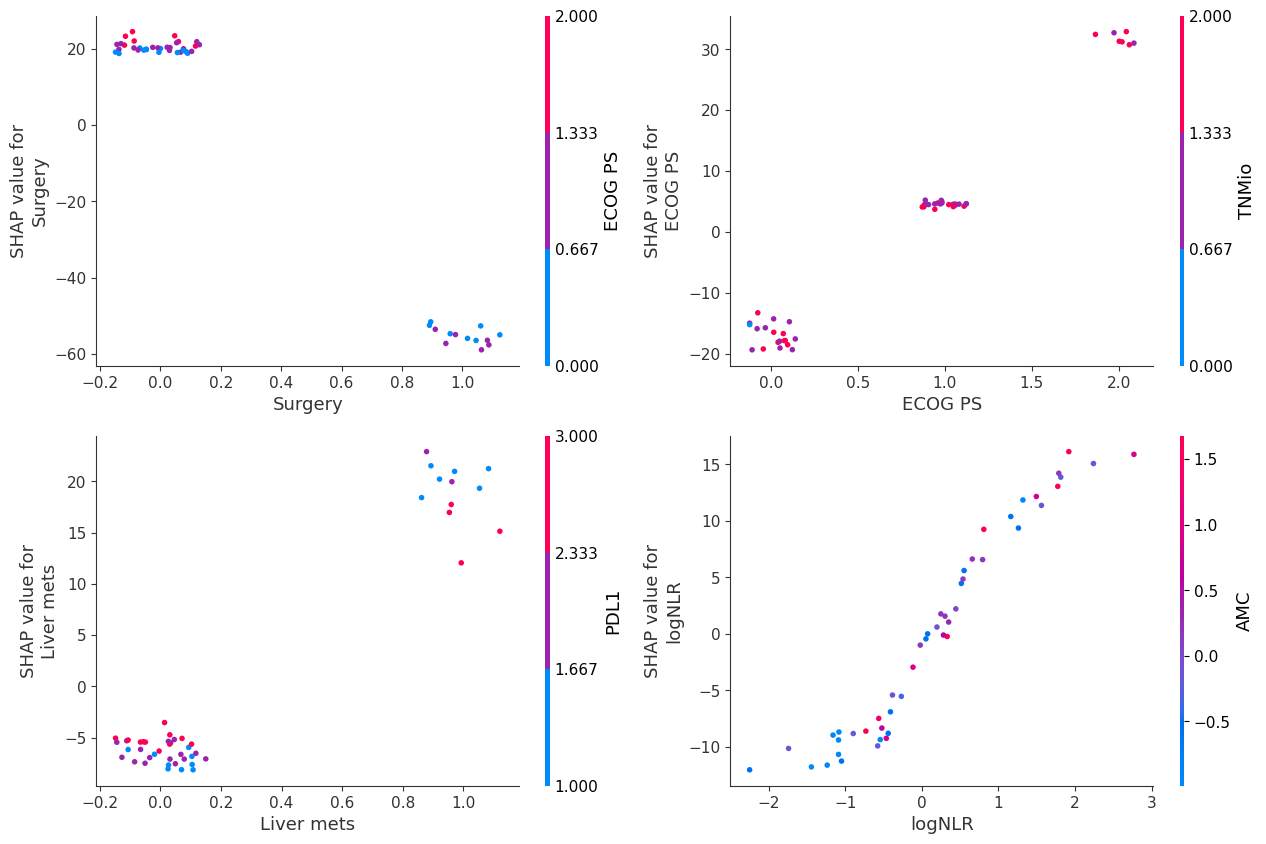

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
shap.dependence_plot('rank(0)', shap_values_et.values, X_t, ax=axes[0, 0], show=False, x_jitter=0.3)
shap.dependence_plot('rank(1)', shap_values_et.values, X_t, ax=axes[0, 1], show=False, x_jitter=0.3)
shap.dependence_plot('rank(2)', shap_values_et.values, X_t, ax=axes[1, 0], show=False, x_jitter=0.3)
shap.dependence_plot('rank(3)', shap_values_et.values, X_t, ax=axes[1, 1], show=False)
plt.show()

## <br><br>XGBSE

In [73]:
from xgbse.metrics import concordance_index, approx_brier_score
from xgbse.non_parametric import get_time_bins
from xgbse import (
    XGBSEKaplanNeighbors,
    XGBSEKaplanTree,
    XGBSEDebiasedBCE,
    XGBSEBootstrapEstimator
)
from xgbse.converters import (
    convert_data_to_xgb_format,
    convert_to_structured
)

In [74]:
dtrain = convert_data_to_xgb_format(X_tr, y_tr, 'survival:cox')
dtest = convert_data_to_xgb_format(X_t, y_t, 'survival:cox')

In [75]:
times = np.linspace(min(y_t["OSGeneraleMesi"])+0.001,max(y_t["OSGeneraleMesi"])-0.001,30)

In [90]:
PARAMS_TREE = {
    'objective': 'survival:aft',
    'eval_metric': 'cox-nloglik',
    'tree_method': 'hist', 
    'max_depth': 12, 
    'booster':'dart', 
    'subsample': 1,
    'min_child_weight': 50, 
    'colsample_bynode': 1,
    'learning_rate': 1e-4
}

# base model as XGBSEKaplanTree
base_model = XGBSEKaplanTree(PARAMS_TREE)

# bootstrap meta estimator
bootstrap_estimator = XGBSEBootstrapEstimator(base_model, n_estimators=600)

# fitting the meta estimator
bootstrap_estimator.fit(X_tr, y_tr, time_bins=times)

# predicting
#mean_tr, upper_ci_tr, lower_ci_tr = bootstrap_estimator.predict(X_tr, return_ci=True)
#mean_t, upper_ci_t, lower_ci_t = bootstrap_estimator.predict(X_t, return_ci=True)

XGBSEBootstrapEstimator(base_estimator=XGBSEKaplanTree(xgb_params={'booster': 'dart',
                                                                   'colsample_bynode': 1,
                                                                   'eval_metric': 'cox-nloglik',
                                                                   'learning_rate': 0.0001,
                                                                   'max_depth': 12,
                                                                   'min_child_weight': 50,
                                                                   'objective': 'survival:aft',
                                                                   'subsample': 1,
                                                                   'tree_method': 'hist'}),
                        n_estimators=600)

In [ ]:
explainer = shap.Explainer(bootstrap_estimator.predict_risk,X_tr)
shap_values_xgb = explainer(X_t)

#plt.figure(figsize=(30, 10))
#shap.plots.beeswarm(shap_values_xgb, max_display=19)

In [ ]:
nn=bootstrap_estimator.predict_risk(X_t)
nn

In [ ]:
plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_values_xgb, max_display=19)

In [ ]:
shap.plots.waterfall(shap_values_xgb[1], max_display=19, show=True)

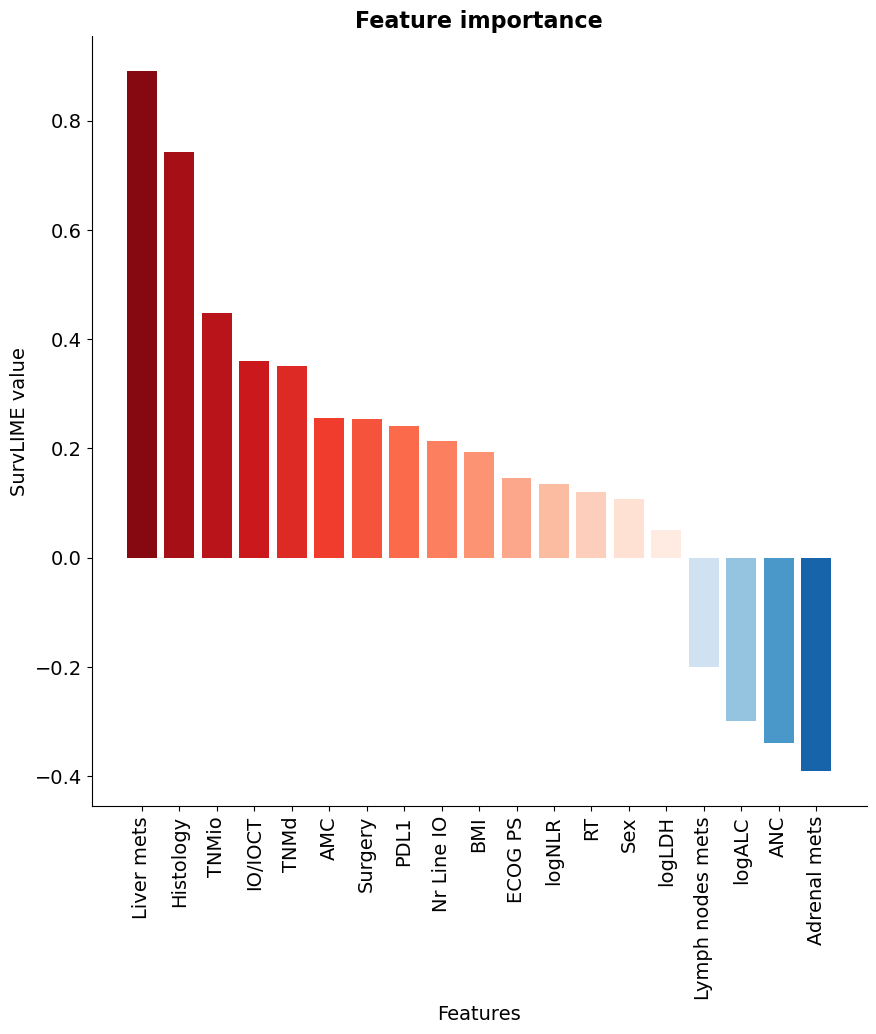

In [95]:
explainer_xgbse = SurvLimeExplainer(
    training_features=X_tr,
    training_events=[tp[0] for tp in y_tr],
    training_times=[tp[1] for tp in y_tr],
    model_output_times=times,
    random_state=10,
)

b_xgbse = explainer_xgbse.explain_instance(
    data_row=X_t.iloc[0],
    predict_fn=bootstrap_estimator.predict,
    num_samples=1000,
    verbose=False
)

explainer_xgbse.plot_weights()

In [22]:
dtrain = convert_data_to_xgb_format(X_tr, y_tr, 'survival:cox')
dtest = convert_data_to_xgb_format(X_t, y_t, 'survival:cox')

In [45]:
dtrain = xgb.DMatrix(X_tr)
dtest = xgb.DMatrix(X_t)

In [46]:
import xgboost as xgb
PARAMS_XGB_COX = {
    'objective': 'survival:cox',
    'tree_method': 'hist', 
    'learning_rate': 0.7, 
    'max_depth': 12, 
    'booster':'dart',
    'subsample':0.5,
    'min_child_weight': 10, 
    'colsample_bynode':0.3
}

In [47]:
bst = xgb.train(
    PARAMS_XGB_COX,
    dtrain,
    #num_boost_round=1000,
    #early_stopping_rounds=10,
    evals=[(dtrain, 'train')],
    verbose_eval=0
)

XGBoostError: [22:54:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:395: Check failed: info.labels.Size() != 0U (0 vs. 0) : label set cannot be empty

In [40]:
exp= shap.Explainer(bst.predict, X_tr)
shap_xg=exp(dtest)

plt.figure(figsize=(30, 10))
shap.plots.beeswarm(shap_xg, max_display=19)

TypeError: 'DMatrix' object is not iterable

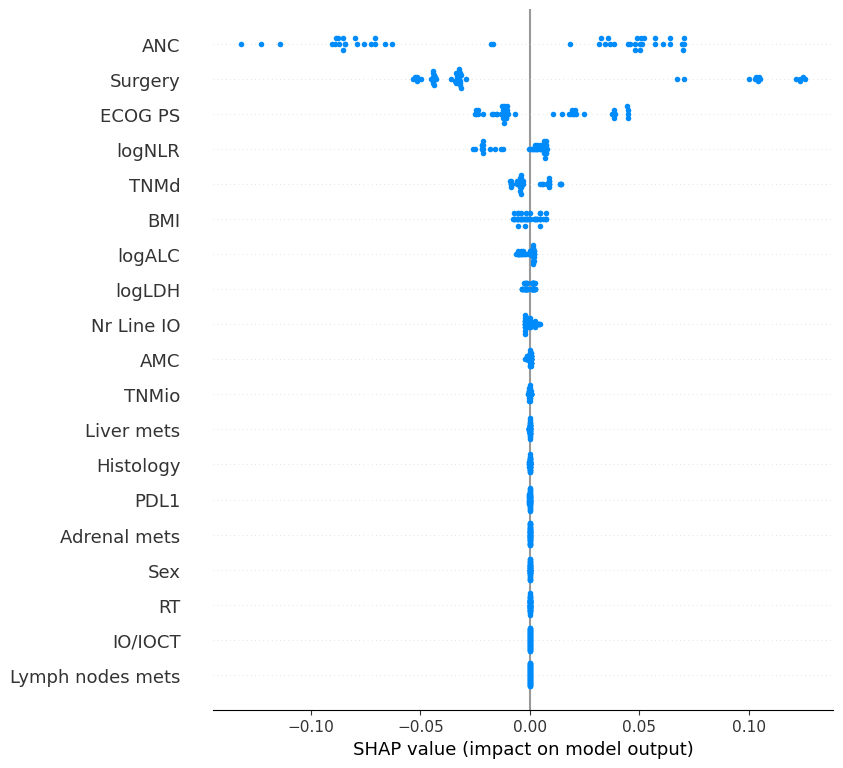

In [29]:
plt.figure(figsize=(30, 10))
shap.plots.beeswarm(uu, max_display=19)

## DeepSurv

In [78]:
import pycox
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

In [79]:
np.random.seed(123)
_ = torch.manual_seed(123)

In [80]:
x_tr=np.array(X_tr).astype('float32')
x_t=np.array(X_t).astype('float32')
x_tr

array([[ 1.8562456 , -0.7912386 , -0.5475825 , ...,  0.        ,
         0.        ,  2.        ],
       [-0.6487857 , -0.30918983, -0.10240202, ...,  0.        ,
         1.        ,  3.        ],
       [-0.6035415 , -0.8090922 , -0.5475825 , ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-0.44970813,  0.5299321 ,  0.19438496, ...,  0.        ,
         1.        ,  2.        ],
       [-0.6036298 , -0.48772642, -0.9185662 , ...,  0.        ,
         1.        ,  2.        ],
       [-0.14712338,  0.34068328,  0.15728658, ...,  0.        ,
         0.        ,  3.        ]], dtype=float32)

In [81]:
get_target = lambda df: (df['OSGeneraleMesi'].values, df['StatusOS'].values)
Y_tr=get_target(y_train)
Y_t=get_target(y_test)
Y_tr

(array([2.42666667e+01, 4.95333333e+01, 7.63333333e+01, 3.49000000e+01,
        1.91666667e+01, 8.50000000e+00, 2.91666667e+01, 2.73666667e+01,
        5.66666667e+00, 7.33333333e+00, 4.10000000e+00, 2.47000000e+01,
        2.08333333e+01, 1.11333333e+01, 7.03333333e+00, 6.10333333e+01,
        9.11333333e+01, 5.80000000e+00, 2.04333333e+01, 6.04000000e+01,
        7.12666667e+01, 9.36666667e+00, 8.94666667e+01, 5.69000000e+01,
        2.18000000e+01, 1.22300000e+02, 1.01000000e+01, 8.54333333e+01,
        5.43000000e+01, 1.37000000e+01, 3.88000000e+01, 5.43666667e+01,
        4.63333333e+01, 6.55000000e+01, 1.56666667e+01, 7.74333333e+01,
        2.90000000e+00, 5.86666667e+00, 3.54666667e+01, 1.29000000e+01,
        4.10000000e+01, 1.87000000e+01, 1.51333333e+01, 7.16666667e+00,
        8.03333333e+00, 4.17333333e+01, 1.94000000e+01, 1.26333333e+01,
        1.27666667e+01, 1.79333333e+01, 2.25666667e+01, 7.23333333e+00,
        1.19666667e+01, 6.83333333e+00, 4.53666667e+01, 4.833333

In [82]:
in_features = x_tr.shape[1]
num_nodes = [32,32]
out_features = 1
batch_norm = True
dropout = 0.2
output_bias = False
batch_size = 16#X_tr.shape[0]
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [83]:
model = CoxPH(net, tt.optim.Adam)
lrfinder = model.lr_finder(x_tr, Y_tr, batch_size, tolerance=10)
#_ = lrfinder.plot()  ---> PLOTTA ANDAMENTO
best_lr=lrfinder.get_best_lr()
#bet_lr
model.optimizer.set_lr(1e-4)

In [84]:
deep_surv = CoxPH(net, tt.optim.Adam())
deep_surv.optimizer.set_lr(0.001)
log = deep_surv.fit(
    input=x_tr,
    target=Y_tr,
    batch_size=batch_size,
    epochs=epochs,
    verbose=False
)

In [85]:
deep_surv.compute_baseline_hazards()
def create_chf(fun):
    def inner(X):
        Y = fun(X)
        return Y.T
    return inner

predict_chf = create_chf(deep_surv.predict_cumulative_hazards)

In [86]:
times = np.linspace(min(y_t["OSGeneraleMesi"])+0.001,max(y_t["OSGeneraleMesi"])-0.001,30)

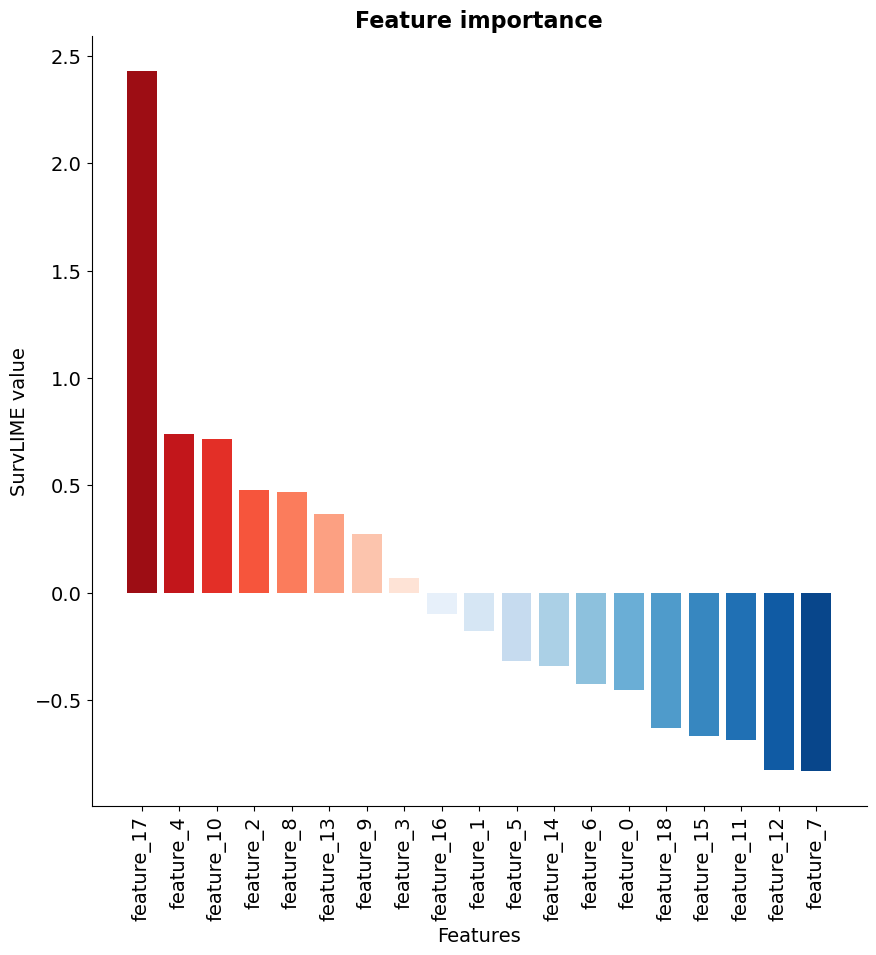

In [87]:
explainer_deepsurv = SurvLimeExplainer(
    training_features=x_tr,
    training_events=[tp[0] for tp in y_tr],
    training_times=[tp[1] for tp in y_tr],
    model_output_times=times,
    random_state=10,
)

b_deepsurv = explainer_deepsurv.explain_instance(
    data_row=x_t[0],
    predict_fn=predict_chf,
    num_samples=1000,
    verbose=False,
)

explainer_deepsurv.plot_weights()